In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [87]:
data = pd.read_csv('data/student_clustering.csv')
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


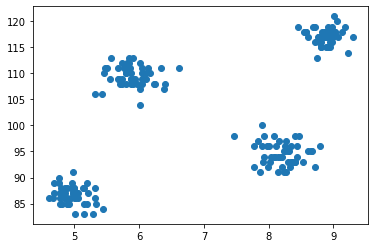

In [88]:
plt.scatter(data['cgpa'],data['iq'])

In [89]:
wcss = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(data)
    wcss.append(km.inertia_)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [90]:
wcss

[29957.898287999997,
 4184.14127,
 2362.7133490000006,
 681.96966,
 514.1616803171115,
 395.96058776918323,
 302.5473746759043,
 234.4868734319922,
 206.9381293615118,
 171.56716356743664,
 154.29958374343366,
 138.24895289205537,
 112.65828581683753,
 98.73371509900339]

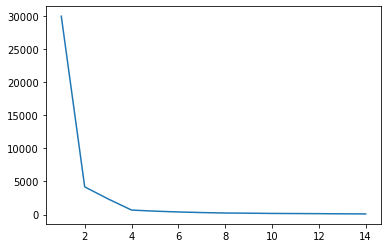

In [91]:
plt.plot(range(1,15),wcss)

In [92]:
X = data.iloc[:,:].values
kmf = KMeans(n_clusters=4)
y_means = kmf.fit_predict(X)

In [93]:
y_means

array([3, 1, 0, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 3, 1, 3, 0, 0, 3,
       2, 2, 0, 1, 2, 1, 3, 3, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 0, 1, 2, 0, 3, 1, 2, 1, 2, 3, 0, 0, 2, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 1, 3, 3, 2, 3, 3, 0, 3, 2, 2,
       0, 2, 1, 1, 0, 2, 0, 1, 2, 3, 3, 1, 0, 2, 0, 3, 0, 1, 3, 0, 0, 1,
       3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 1, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2,
       3, 0, 1, 2, 1, 0, 3, 2, 1, 0, 2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 0,
       2, 1, 3, 2, 2, 1, 1, 1, 0, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0, 3, 2, 1,
       1, 2])

In [94]:
X[y_means==0][1:5] #values of cluster 0

array([[ 8.27, 97.  ],
       [ 8.41, 98.  ],
       [ 8.09, 94.  ],
       [ 8.16, 97.  ]])

In [95]:
X[y_means==1][1:5] #values of cluster 1

array([[  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ]])

In [96]:
X[y_means==2][1:5] #values of cluster 2

array([[  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ]])

In [97]:
X[y_means==3][1:5] #values of cluster 3

array([[ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ]])

In [98]:
#extract 1st feature of a cluster
X[y_means==1,0][1:5] #cgpa values of cluster 1

array([5.45, 5.88, 5.79, 6.1 ])

In [99]:
#extract second feature of a cluster
X[y_means==1,1][1:5] #iq values of cluster 1

array([110., 109., 110., 110.])

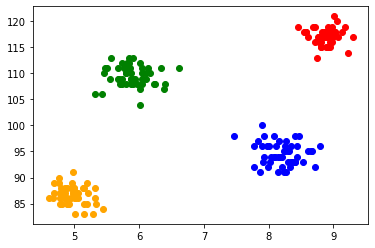

In [100]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color ='blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color ='green')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color ='red')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color ='orange')

# Multifeature Data

In [101]:
data  = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
data.drop('CustomerID',axis=1,inplace=True)

In [103]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [104]:
for i in range(data.shape[0]):
    if data['Genre'][i]=='Male':
        data['Genre'][i]=0
    else:
        data['Genre'][i]=1

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2623057773.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2623057773.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


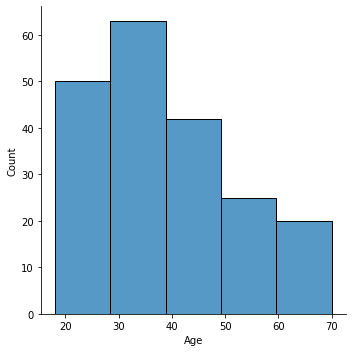

In [106]:
sns.displot(data['Age'],bins=5,kde=False)

In [107]:
for i in range(data.shape[0]):
    if data['Age'][i]>=18 and data['Age'][i]<31:
        data['Age'][i]=0
    elif data['Age'][i]>=31 and data['Age'][i]<44:
        data['Age'][i]=1
    elif data['Age'][i]>=44 and data['Age'][i]<57:
        data['Age'][i]=2
    elif data['Age'][i]>=57 and data['Age'][i]<70:
        data['Age'][i]=3
    else :
        data['Age'][i]=4

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2964763098.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2964763098.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2964763098.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\91700\AppData\Local\Temp/ipykernel_20820/2964763098.py:7: SettingWithCopyWarning:


A value

In [108]:
data.head()
data_new = data.iloc[:,2:]

In [109]:
scale = StandardScaler()
data = scale.fit_transform(data)

In [110]:
wcss = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km.fit(data)
    wcss.append(km.inertia_)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [111]:
wcss

[800.0,
 588.3499651625548,
 476.34754745967865,
 384.93549612542876,
 323.8473902470712,
 287.75834085574513,
 244.96593658047053,
 206.62105305403628,
 175.21235934806248,
 159.91205687483995,
 138.49372033286738,
 127.08890800001039,
 120.26279179767316,
 109.18934817429906,
 105.50201965444509,
 97.2434390643116,
 92.77453426464568,
 87.83133141108128,
 82.34370009048577]

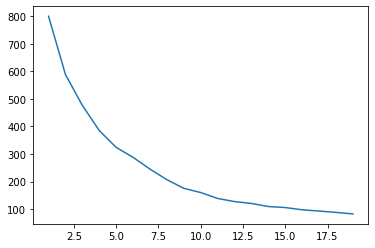

In [112]:
plt.plot(range(1,20),wcss)
#plt.scatter(range(1,20),wcss,color='red')

In [123]:
X = data_new.iloc[:,:].values

In [125]:
km = KMeans(n_clusters=5,random_state=2)
y_means = km.fit_predict(X)
y_means

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

Text(0, 0.5, 'Spending Score')

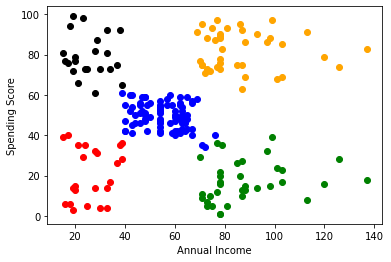

In [128]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color ='blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color ='green')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color ='red')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color ='orange')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color ='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')